CA1 Data Analysis and Visualization

I create a composite indicator to evaluate chess openings based on 3 index: effectiveness, popularity, and complexity. This indicator will integrate various metrics such as win rates, frequency of use to offer a comprehensive assessment of each opening.

I will use the following dataset: (Available at: https://www.kaggle.com/datasets/alexandrelemercier/all-chess-openings)

In [87]:
import pandas as pd

df = pd.read_csv('archive/openings.csv')
print(df.head())

   Unnamed: 0                                            Opening Colour  \
0           0                 Alekhine Defense, Balogh Variation  white   
1           1               Alekhine Defense, Brooklyn Variation  black   
2           2               Alekhine Defense, Exchange Variation  white   
3           3                Alekhine Defense, Four Pawns Attack  white   
4           4  Alekhine Defense, Four Pawns Attack, Fianchett...  black   

   Num Games  ECO Last Played  Perf Rating  Avg Player  Player Win %  Draw %  \
0        692  B03  2018-06-22         2247        2225          40.8    24.3   
1        228  B02  2018-06-27         2145        2193          29.8    22.4   
2       6485  B03  2018-07-06         2244        2194          40.8    27.7   
3        881  B03  2018-06-20         2187        2130          39.7    23.2   
4        259  B03  2018-05-20         2122        2178          37.8    21.2   

   ...  move2b move3w move3b move4w move4b White_win% Black_win% Whi

1. Theoretical Framework: Chess Openings

In chess, the choice of opening can be a determining factor in a player's success. For this reason, the proposed composite index seeks to quantify the multiple facets of chess openings, by synthesizing data relating to various dimensions: effectiveness, popularity and complexity. The aim is to provide a tool that players of all levels can use to make informed decisions about their repertoire of openings, facilitating strategic preparation and decision-making.

The data selected comes from an extensive database of recorded games, covering a wide range of games, from amateur encounters to grandmaster confrontations. This comprehensive collection ensures that the index is representative of the entire chess-playing community. Drawing on quantifiable measures such as win and draw percentages, frequency of use and move sequences.

<b>Data select:</b>
<ul>
    <li>Num Game</li>
    <li>Last Played</li>
    <li>Perf Rating</li>
    <li>Avg Player Rating</li>
    <li>Player Win %</li>
    <li>Draw %</li>
    <li>Opponent Win %</li>
    <li>Number of moves</li>
</ul>

<ol>
<li>
Popularity indicator:
    <ul>
    <li>Num Games: How frequently the opening is used.</li>
    <li>Last Played: Recent use to identify current trends.</li>
    </ul>
</li>
<li>
Performance indicator:
    <ul>
    <li>Perf Rating and Avg Player Rating: average success and skill level associated with the openings.</li>
    <li>Player Win % 
    <li>Draw %</li>
    <li>Opponent Win %</li> 
     =>Direct outcomes when the opening is used.
    </ul>
</li>
<li>
Complexity indicator:
    <ul>
    <li>Number of moves: The length and complexity of the opening moves can indicate strategic depth.</li>
    </ul>
</li>
</ol>

In [88]:
# add a column to the dataframe
df['Num Moves'] = df['moves_list'].apply(lambda x: len(x.split()))

# # add the data last_played, a number of days since the last played game
df['Last Played'] = df['Last Played'].apply(lambda x: (pd.to_datetime('today') - pd.to_datetime(x)).days)



In [89]:
selected_variable = ['Opening', 'Colour', 'Num Games', 'Last Played', 'Perf Rating', 'Avg Player', 'Player Win %', 'Draw %', 'Opponent Win %','Num Moves']

df = df[selected_variable]

# print(df.head())

# Split the 'Opening' column into 'Opening Name' and 'Variation' based on the first comma
df[['Opening Name', 'Variation']] = df['Opening'].str.split(',', n=1, expand=True)

# print(df.sample(5))

# Strip any leading or trailing whitespace characters that may have appeared from the split
df['Opening Name'] = df['Opening Name'].str.strip()
df['Variation'] = df['Variation'].str.strip()

# Group by 'Opening Name' and aggregate the data
# For numeric columns like 'Num Games', 'Perf Rating', etc., you can sum or average them
# Count the number of variations for each opening
aggregated_data = df.groupby('Opening Name').agg({
    'Num Games': 'sum',
    'Last Played': 'mean',
    'Perf Rating': 'mean',
    'Avg Player': 'mean',
    'Player Win %': 'mean',
    'Draw %': 'mean',
    'Opponent Win %': 'mean',
    'Num Moves': 'mean',
    'Variation': 'count'  # Counts the number of variations
}).rename(columns={'Variation': 'Num Variations', 'Num Moves': 'Avg Num Moves'})

# Reset index to make 'Opening Name' a column again
aggregated_data.reset_index(inplace=True)

# Save the modified dataframe to a new CSV file or continue analysis
aggregated_data.to_csv('archive/modified_openings.csv', index=False)

print(aggregated_data.sample(5))
print(aggregated_data.info())

data = pd.read_csv('archive/modified_openings.csv')



               Opening Name  Num Games  Last Played  Perf Rating   Avg Player  \
49     Neo-Grünfeld Defense       1582  2130.500000  2117.500000  2179.500000   
59           Polish Defense       1067  2136.000000  2093.000000  2168.000000   
67  Queen's Gambit Declined     117686  2170.054054  2310.945946  2300.986486   
36            King's Gambit      10139  2210.242424  2172.848485  2171.454545   
40      King's Pawn Opening       7040  2129.000000  2120.000000  2087.000000   

    Player Win %     Draw %  Opponent Win %  Avg Num Moves  Num Variations  
49     22.050000  22.750000       55.250000       6.000000               2  
59     31.000000  22.200000       46.800000       2.000000               1  
67     33.410811  38.824324       27.772973      12.013514              74  
36     41.254545  20.196970       38.539394       6.727273              33  
40     39.000000  23.500000       37.500000       1.000000               1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9

In [90]:
# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate:", data.duplicated().sum())

Opening Name      0
Num Games         0
Last Played       0
Perf Rating       0
Avg Player        0
Player Win %      0
Draw %            0
Opponent Win %    0
Avg Num Moves     0
Num Variations    0
dtype: int64

Number of duplicate: 0


In [93]:
# Creation of the category Performance

# Normalize the columns
data['Normalized Perf Rating'] = (data['Perf Rating'] - data['Perf Rating'].min()) / (data['Perf Rating'].max() - data['Perf Rating'].min())
data['Normalized Player Win %'] = (data['Player Win %'] - data['Player Win %'].min()) / (data['Player Win %'].max() - data['Player Win %'].min())
data['Normalized Opponent Win %'] = (data['Opponent Win %'] - data['Opponent Win %'].min()) / (data['Opponent Win %'].max() - data['Opponent Win %'].min())
data['Normalized Draw %'] = (data['Draw %'] - data['Draw %'].min()) / (data['Draw %'].max() - data['Draw %'].min())

# Reverse the Opponent Win % normalization because a lower opponent win rate is better for the opening
data['Normalized Opponent Win %'] = 1 - data['Normalized Opponent Win %']

print(data.sample(5))

            Opening Name  Num Games  Last Played  Perf Rating   Avg Player  \
27      Gunderam Defense        613  2140.000000  2084.000000  2171.000000   
87     Trompowsky Attack      26990  2130.333333  2283.166667  2263.666667   
75  Scandinavian Defense      51575  2150.000000  2118.772727  2129.363636   
23     Four Knights Game      23230  2152.500000  2220.791667  2222.166667   
63   Pterodactyl Defense       2301  2152.375000  2226.625000  2213.125000   

    Player Win %     Draw %  Opponent Win %  Avg Num Moves  Num Variations  \
27     31.800000  21.900000       46.300000       4.000000               1   
87     39.916667  26.850000       33.266667       4.833333               6   
75     34.159091  25.900000       39.954545       7.272727              22   
23     31.400000  35.729167       32.866667       9.916667              24   
63     33.937500  26.425000       39.650000       8.125000               8   

    Normalized Perf Rating  Normalized Player Win %  \
27     

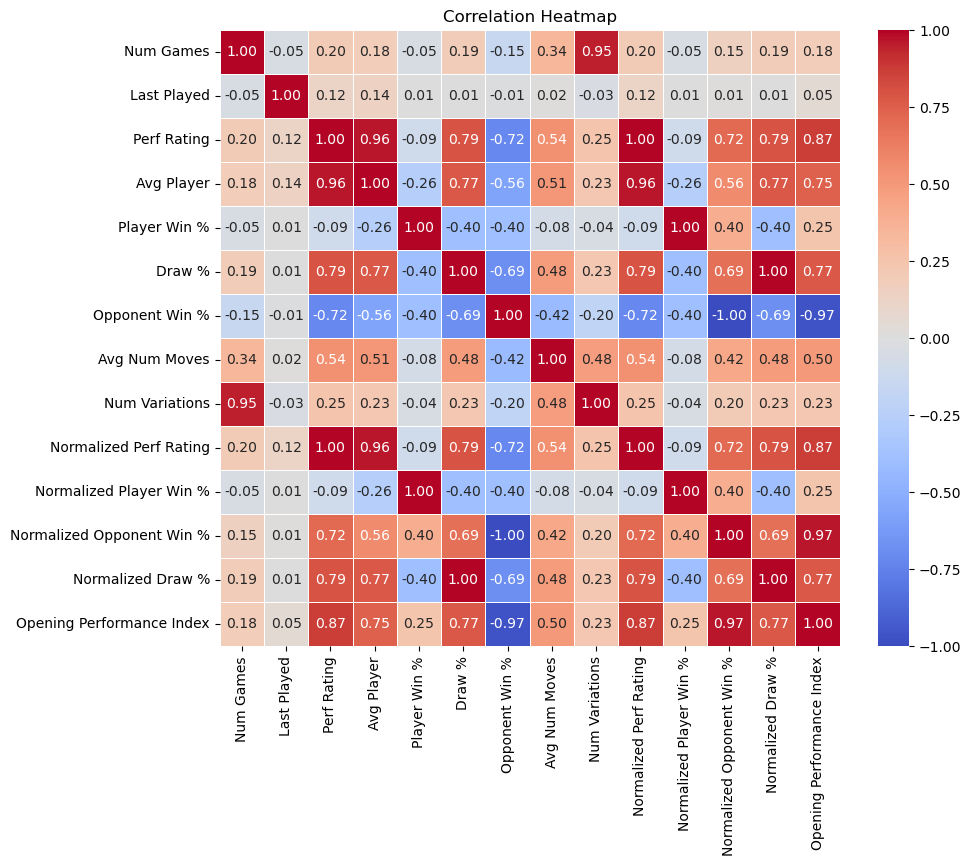

In [100]:
# scatter plot on the variables from the performance category

import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns from the correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


